In [1]:
from __future__ import print_function

#Probability and Statistics in Python

##Standard Deviation and Correlation

###1: The mean as the center

We have looked briefly at the mean before, but it has an interesting property.

If we subtract the mean of a set of numbers from each of the numbers, the differences will always add up to zero.

This is because the mean is the "center" of the data. All of the differences that are negative will always cancel out all of the differences that are positive.

Let's look at some examples to verify this.

Let's also get familiar with the mathematical symbol for the mean \mathbf{\bar{x}} this symbol means "the average of all the values in x". The fact that x is lowercase but bold means that it is a vector. The bar over top means "the average of".

####Instructions

Find the median of the values list. Assign the result to values_median.

Subtract the median from each element in values. Sum up all of the differences, and assign the result to median_difference_sum.

In [2]:
from numpy import median

# Make a list of values.
values = [2, 4, 5, -1, 0, 10, 8, 9]
# Compute the mean of the values.
values_mean = sum(values) / len(values)
# Find the difference between each of the values and the mean by subtracting the mean from each value.
differences = [i - values_mean for i in values]
# This equals 0.  Try changing the values around and verifying that it equals 0 if you want.
print("sum(differences):", sum(differences))

# We can use the median function from numpy to find the median.
# The median is the "middle" value in a set of values -- if you sort the values in order, it's the one in the center (or the average of the two in the center if there are an even number of items in the set).
# You'll see that the differences from the median don't always add to 0.  You might want to play around with this and think about why that is.
values_median = median(values)
differences = [i - values_median for i in values]
median_difference_sum = sum(differences)

print("median_difference_sum:", median_difference_sum)

sum(differences): 0.0
median_difference_sum: 1.0


###2: Finding variance

Let's look at variance in the data.

Variance tells us how "spread out" the data is around the mean.

We looked at kurtosis earlier, which measures the shape of a distribution.

Variance directly measures how far from the mean the average element in the data is.

We calculate variance by subtracting every value from the mean, squaring the results, and averaging them.

Mathemically, this looks like $\sigma^2 = \frac{\displaystyle\sum_{i=1}^{n}(x_i - \mathbf{\bar{x}})^2} {n}$, where, $\sigma^2$ is variance, $\sum_{i=1}^{n}$ means "the sum from 1 to n", where n is the number of elements in a vector. The formula does the exact same thing we just described, but is the most common way to show it.

The "pf" column in the data is the total number of personal fouls each player had called on them in the season -- let's look at its variance.

####Instructions

Compute the variance of the "pts" column in the data -- this it total points scored.

Assign the result to point_variance.

In [3]:
import csv
import pandas as pd
import matplotlib.pyplot as plt

nba_stats = pd.read_csv('data/nba_2013.csv')

# The nba data is loaded into the nba_stats variable.
# Find the mean value of the column.
pf_mean = nba_stats["pf"].mean()

# Initialize variance at zero.
variance = 0
# Loop through each item in the "pf" column.
for p in nba_stats["pf"]:
    # Calculate the difference between the mean and the value.
    difference = p - pf_mean
    # Square the difference -- this ensures that the result isn't negative.
    # If we didn't square the difference, the total variance would be zero.
    # ** in python means "raise whatever comes before this to the power of whatever number is after this".
    square_difference = difference ** 2
    # Add the difference to the total.
    variance += square_difference
    
# Average the total to find the final variance.
variance = float(variance) / len(nba_stats["pf"])
point_mean = nba_stats["pts"].mean()

point_variance = 0
for p in nba_stats["pts"]:
    difference = p - point_mean
    square_difference = difference ** 2
    point_variance += square_difference
    
point_variance = float(point_variance) / len(nba_stats["pts"])
print("point_variance:", point_variance)

point_variance: 220836.99585496247


###3: Order of operations

We've been multiplying and dividing values, but we haven't really discussed order of operations yet.

Order of operations define which mathematical operations occur in which sequence.

Think about 2 * 5 - 1 -- depending on whether we do the multiplication first, or the subtraction first, the result will change.

If we multiply first, we get 10 - 1, which equals 9.

If we subtract first, we get 2 * 4, which equals 8.

We definitely want the results of these operations to be consistent -- we don't want to sometimes get 8, and sometimes get 9.

Because of this, we have an order of operations.

At the top is raising something to a power (x ** y), then multiplication (x * y) and division (x / y) are equal, and then addition (x + y) and subtraction (x - y) are equal.

So raising something to a power will always happen first, then any multiplication/division, and last any addition/subtraction.

We'll play around with this to get a better feel for it.

####Instructions

Change the mathematical operations around so that c equals 25, and d equals .5.

In [4]:
# You might be wondering why multiplication and division are on the same level.
# It doesn't matter whether we do the multiplication first, or the division first -- the answer here will always be the same.
# In this case, we need to think of division as multiplication by a fraction -- otherwise, we'll be dividing more than we want to.
# Create a formula.
a = 5 * 5 / 2

# Multiply by 1/2 instead of dividing by 2 -- the result is the same (2/2 == 2 * 1/2).
a_subbed = 5 * 5 * 1/2
a_mul_first = 25 * 1/2
a_div_first = 5 * 2.5
print("a_mul_first == a_div_first:", a_mul_first == a_div_first)

# The same thing is true for subtraction and addition.
# In this case, we need to convert subtraction into adding a negative number -- if we don't we'll end up subtracting more than we expect.
b = 10 - 8 + 5
# Add -8 instead of subtracting 8.
b_subbed = 10 + -8 + 5
b_sub_first = 2 + 5
b_add_first = 10 + -3
print("b_sub_first == b_add_first:", b_sub_first == b_add_first)

c = 10 / 2 + 5
d = 3 - 1 / 2 * 2
c = 10 / 2 * 5
d = 3 - 1 / 2 - 2

a_mul_first == a_div_first: True
b_sub_first == b_add_first: True


###4: Using parentheses

Parentheses can be used to "override" the order of operations and make something happen first.

For example 10 - 2 / 2 will equal 9, because the division happens before the subtraction.

If we write (10 - 2) / 2, the parentheses "force" the part inside to happen first, so we end up with 8/2.

####Instructions

Use parentheses to make b equal 1100.

Use parentheses to make c equal 200.

In [5]:
a = 50 * 50 - 10 / 5
a_paren = 50 * (50 - 10) / 5
# If we put multiple operations inside parentheses, the order of operations is used inside to determine the order.
a_paren = 50 * (50 - 10 / 5)

b = 10 * 10 + 100
c = 8 - 6 * 100
b = 10 * (10 + 100)
c = (8 - 6) * 100

###5: Fractional powers

Before we explore variance a little more, let's take a quick look at exponents.

We did difference ** 2 in the last screen, which squared the difference -- this is equal to difference * difference.

We could cube the difference by doing difference ** 3 -- this is equal to difference * difference * difference.

This same pattern holds true as we raise to higher powers, like 4, 5, and so on.

We can also take roots of numbers with the same syntax.

difference ** (1/2) will take the square root -- we need to put the fraction in parentheses because raising a value to a power always happens first normally.

difference ** (1/3) will take the cube root. And so on with smaller fractions.

####Instructions

Raise 11 to the fifth power. Assign the result to e.

Take the fourth root of 10000. Assign the result to f.

In [6]:
a = 5 ** 2

# Raise to the fourth power.
b = 10 ** 4

# Take the square root ( 3 * 3 == 9, so the answer is 3).
c = 9 ** (1/2)

# Take the cube root (4 * 4 * 4 == 64, so 4 is the cube root).
d = 64 ** (1/3)
e = 11 ** 5
f = 10000 ** (1/4)

###6: Calculating standard deviation

A commonly used way to refer to how far data points are from the mean is called standard deviation.

It is typical to measure what percentage of the data is within 1 standard deviation of the mean, or two standard deviations of the mean.

Standard deviation is a very useful concept, and is a great way to measure how spread out data is.

Luckily for us, standard deviation is just the square root of the variance.

Here's the mathematical formula for standard deviation $\sigma = \sqrt{\frac{\displaystyle\sum_{i=1}^{n}(x_i - \mathbf{\bar{x}})^2} {n}}$.

####Instructions

Make a function that calculates the standard deviation of a given column in the nba_stats data.

Use the function to calculate the standard deviation for the minutes played column ("mp"). Assign the results to mp_dev.

Use the function to calculate the standard deviation for the assists column ("ast"). Assign the results to ast_dev.

In [7]:
# The nba stats are loaded into the nba_stats variable.
def calc_column_deviation(column):
    mean = column.mean()
    variance = 0
    for p in column:
        difference = p - mean
        square_difference = difference ** 2
        variance += square_difference
    variance = variance / len(column)
    return variance ** (float(1)/2)

mp_dev = calc_column_deviation(nba_stats["mp"])
print("mp_dev:", mp_dev)

ast_dev = calc_column_deviation(nba_stats["ast"])
print("ast_dev :", ast_dev)

mp_dev: 896.32565278
ast_dev : 130.883290708


###7: Find standard deviation distance

The standard deviation is very useful because it lets us compare points in a distribution to the mean.

We can say that a certain point is "two standard deviations away from the mean".

This gives us a way to compare how spread out values are across different charts.

####Instructions

Find how many standard deviations away from the mean point_10 is. Assign the result to point_10_std.

Find how many standard deviations away from the mean point_100 is. Assign the result to point_100_std.

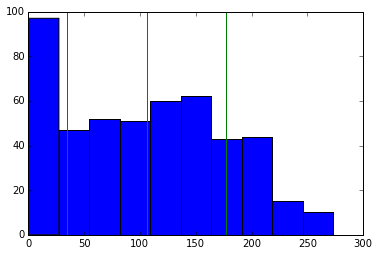

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(nba_stats["pf"])
mean = nba_stats["pf"].mean()
plt.axvline(mean, color="r")
# We can calculate standard deviation by using the std() method on a pandas series.
std_dev = nba_stats["pf"].std()
# Plot a line one standard deviation below the mean
plt.axvline(mean - std_dev, color="g")
# Plot a line one standard deviation above the mean
plt.axvline(mean + std_dev, color="g")

# We can see how much of the data points fall within 1 standard deviation of the mean
# The more that falls into this range, the less spread out the data is
plt.show()

# We can calculate how many standard deviations a data point is from the mean by doing some subtraction and division
# First, we find the total distance by subtracting the mean
total_distance = nba_stats["pf"][0] - mean
# Then we divide by standard deviation to find how many standard deviations away the point is.
standard_deviation_distance = total_distance / std_dev

point_10 = nba_stats["pf"][9]
point_100 = nba_stats["pf"][99]
point_10_std = (float(point_10) - mean) / std_dev
point_100_std = (float(point_100) - mean) / std_dev

###8: Working with the normal distribution

The normal distribution is a special kind of distribution.

You might recognize it more commonly as a bell curve.

The normal distribution is found in a variety of natural phenomena. For example, if you made a histogram of the heights of all humans, it would be more or less a normal distribution.

We can generate a normal distribution by using a probability density function.

####Instructions

Make a normal distribution across the range that starts at -10, ends at 10, and has the step .1.

The distribution should have mean 0 and standard deviation of 2.

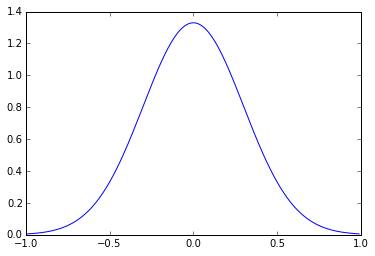

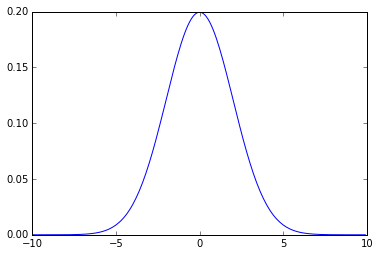

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# The norm module has a pdf function (pdf stands for probability density function).
from scipy.stats import norm

# The arange function generates a numpy vector.
# The vector below will start at -1, and go up to, but not including 1.
# It will proceed in "steps" of .01.  So the first element will be -1, the second -.99, the third -.98, all the way up to .99.
points = np.arange(-1, 1, 0.01)

# The norm.pdf function will take points vector and turn it into a probability vector.
# Each element in the vector will correspond to the normal distribution (earlier elements and later element smaller, peak in the center).
# The distribution will be centered on 0, and will have a standard devation of .3
probabilities = norm.pdf(points, 0, .3)

# Plot the points values on the x axis and the corresponding probabilities on the y axis.
# See the bell curve?
plt.plot(points, probabilities)
plt.show()

points = np.arange(-10, 10, 0.1)
probabilities = norm.pdf(points, 0, 2)
plt.plot(points, probabilities)
plt.show()

###9: Normal distribution deviation

One cool thing about normal distributions is that for every single one, the same percentage of the data is within 1 standard deviation of the mean, the same percentage is within 2 standard deviations of the mean, and so on.

About 68% of the data is within 1 standard deviation of the mean, about 95% is within 2 standard deviations of the mean, and about 99% is within 3 standard deviations of the mean.

This helps us to quickly understand where values fall and how unusual they are.

####Instructions

For each point in wing_lengths, calculate the number of standard deviations away from the mean the point is.

Once you have done this, compute what percentage of the data is within 1 standard deviation of the mean. Assign the result to within_one_percentage.

Compute what percentage of the data is within 2 standard deviations of the mean. Assign the result to within_two_percentage.

Once you have done this, compute what percentage of the data is within 3 standard deviations of the mean. Assign the result to within_three_percentage.

In [10]:
# Housefly wing lengths in millimeters.
wing_lengths = [36, 37, 38, 38, 39, 39, 40, 40, 40, 40, 41, 41, 41, 41, 41, 41, 42, 42, 42, 42, 42, 42, 42, 43, 43, 
                43, 43, 43, 43, 43, 43, 44, 44, 44, 44, 44, 44, 44, 44, 44, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 
                46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 47, 47, 47, 47, 47, 47, 47, 47, 47, 48, 48, 48, 48, 48, 48, 
                48, 48, 49, 49, 49, 49, 49, 49, 49, 50, 50, 50, 50, 50, 50, 51, 51, 51, 51, 52, 52, 53, 53, 54, 55]

mean = float(sum(wing_lengths)) / len(wing_lengths)
variances = [(i - mean) ** 2 for i in wing_lengths]
variance = float(sum(variances))/ len(variances)
standard_deviation = variance ** (float(1)/2)
standard_deviations = [float(i - mean) / standard_deviation for i in wing_lengths]

def within_percentage(deviations, count):
    within = [i for i in deviations if i <= count and i >= -count]
    count = len(within)
    return float(count) / len(deviations)

within_one_percentage = within_percentage(standard_deviations, 1)
print("within_one_percentage:", within_one_percentage)

within_two_percentage = within_percentage(standard_deviations, 2)
print("within_two_percentage:", within_two_percentage)

within_three_percentage = within_percentage(standard_deviations, 3)
print("within_three_percentage:", within_three_percentage)

within_one_percentage: 0.68
within_two_percentage: 0.96
within_three_percentage: 1.0


###10: Plotting correlations

We've spent a lot of time looking at single variables and how their distributions look.

While distributions are interesting on their own, it's also interesting to look at how two variables correlate with each other.

A lot of statistics is about analyzing how variables impact each other, and the the first step is to graph them out with a scatterplot.

While graphing them out, we can look at correlation.

If two variables both change together (ie, when one goes up, the other goes up), we know that they are correlated.

####Instructions

Make a scatterplot of the "fta" (free throws attempted) column against the "pts" column.

Make a scatterplot of the "stl" (steals) column against the "pf" column.

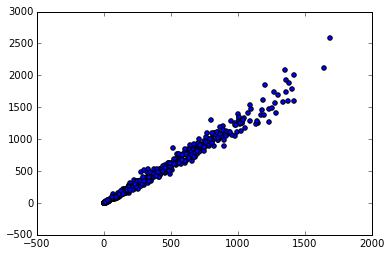

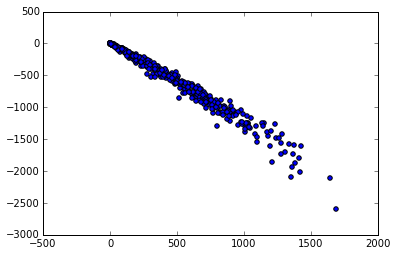

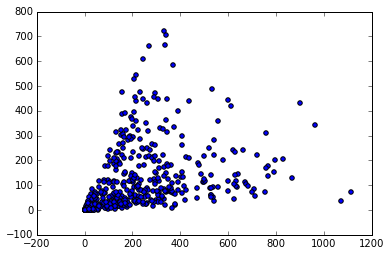

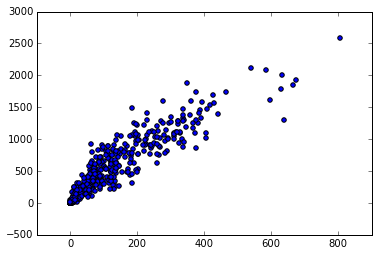

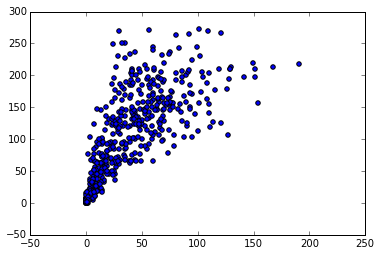

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

# This is plotting field goals attempted (number of shots someone takes in a season) vs point scored in a season
# Field goals attempted is on the x-axis, and points is on the y-axis
# As you can tell, they are very strongly correlated -- the plot is close to a straight line.
# The plot also slopes upward, which means that as field goal attempts go up, so do points.
# That means that the plot is positively correlated.
plt.scatter(nba_stats["fga"], nba_stats["pts"])
plt.show()

# If we make points negative (so the people who scored the most points now score the least, because 3000 becomes -3000), we can change the direction of the correlation
# Field goals are negatively correlated with our new "negative" points column -- the more free throws you attempt, the less negative points you score.
# We can see this because the correlation line slopes downward.
plt.scatter(nba_stats["fga"], -nba_stats["pts"])
plt.show()

# Now, we can plot total rebounds (number of times someone got the ball back for their team after someone shot) vs total assists (number of times someone helped another person score)
# These are uncorrelated, so you don't see the same nice line as you see with the plot above.
plt.scatter(nba_stats["trb"], nba_stats["ast"])
plt.show()

plt.scatter(nba_stats["fta"], nba_stats["pts"])
plt.show()

plt.scatter(nba_stats["stl"], nba_stats["pf"])
plt.show()

###11: Measuring correlation

One thing that can help us a lot when we need to analyze a lot of variables is to measure correlation -- this means that we don't need to eyeball everything.

The most common way to measure correlation is to use pearson's r, also called an r-value.

We'll go through how the calculations for it work, but for now, we'll focus on the values.

An r-value ranges from -1 to 1, and indicates how strongly two variables are correlated.

A 1 means perfect positive correlation -- this would show as a straight, upward sloping, line on our plots.

A 0 means no correlation -- you'll see a scatterplot with points placed randomly.

A -1 means perfect negative correlation -- this would show as a straight, downward sloping line.

Anything between -1 and 0, and 0 and 1 will show up as a scattering of points. The closer the value is to 0, the more random the points will look. The closer to -1 or 1, the more like a line the points will look.

We can use a function from scipy to calculate pearson's r for the moment.

####Instructions

Find the correlation between the "fta" column and the "pts" column. Assign the result to r_fta_pts.

Find the correlation between the "stl" column and the "pf" column. Assign the result to r_stl_pf.

In [12]:
from scipy.stats.stats import pearsonr

# The pearsonr function will find the correlation between two columns of data.
# It returns the r value and the p value.  We'll learn more about p values later on.
r, p_value = pearsonr(nba_stats["fga"], nba_stats["pts"])
# As we can see, this is a very high positive r value -- close to 1.
print("r:", r)

# These two columns are much less correlated.
r, p_value = pearsonr(nba_stats["trb"], nba_stats["ast"])
# We get a much lower, but still positive, r value.
print("r:", r)

r_fta_pts, p_value = pearsonr(nba_stats["fta"], nba_stats["pts"])
r_stl_pf, p_value = pearsonr(nba_stats["stl"], nba_stats["pf"])

r: 0.989211400652
r: 0.369861731248


###12: Calculate covariance

We looked at calculating the correlation coefficient with a function, but let's briefly look under the hood to see how we can do it ourselves.

Another way to think of correlation is variance.

Two variables are correlated when they both individually vary in similar ways.

For example, correlation occurs when if one variable goes up, another variable also goes up.

This is called covariance. Covariance is how things vary together.

There is a maximum amount to how much two variables can co-vary.

This is because of how each variable is individually distributed. Each individual distribution has its own variance. These variances set a maximum theoretical limit on covariance between two variables -- you can't co-vary more from the mean than the two variables individually vary from the mean.

As you may have guessed at this point, the r-value is a ratio between the actual covariance, and the maximum possible positive covariance.

The maximum possible covariance occurs when two variables vary perfectly (ie, you see a straight line on the plot).

Let's look at actual covariance first. Mathematically speaking, covariance between two variables looks like this: $cov(\mathbf{x},\mathbf{y})=
\frac{\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y})}{n}$. For each element in the vectors x and y, you take the value at each position from 1 to the length of the vectors. Subtract the mean of the vector from that value. Then multiply them together at each position, and all all of the resulting values together.

####Instructions

Make a function to compute covariance.

Use the function to compute the covariance of the "stl" and "pf" columns. Assign the result to cov_stl_pf.

Use the function to compute the covariance of the "fta" and "pts" columns. Assign the result to cov_fta_pts.

In [13]:
# The nba_stats variable has been loaded.
def covariance(x, y):
    x_mean = float(sum(x)) / len(x)
    y_mean = float(sum(y)) / len(y)
    x_diffs = [i - x_mean for i in x]
    y_diffs = [i - y_mean for i in y]
    codeviates = [x_diffs[i] * y_diffs[i] for i in range(len(x))]
    return float(sum(codeviates)) / len(codeviates)

cov_stl_pf = covariance(nba_stats["stl"], nba_stats["pf"])
print("cov_stl_pf:", cov_stl_pf)

cov_fta_pts = covariance(nba_stats["fta"], nba_stats["pts"])
print("cov_fta_pts:", cov_fta_pts)

cov_stl_pf: 1823.3548480513116
cov_fta_pts: 56618.41398074862


###13: Calculate correlation

Now that we know how to calculate covariance, we can finish calculating correlation.

Here's the full formula for correlation: $\frac{cov(\mathbf{x},\mathbf{y})}{\sqrt{\sigma_{2}^{x}\sigma_{2}^{y}}}$.

To get the denominator, we just have to find the variance for x and y, multiply them together, and take the square root. This is the maximum possible positive covariance -- it's just both the total variances multiplied.

If we divide our actual covariance by this, we get our r-value.

You can use the var method on any pandas dataframe or series to find variance. nba_stats["pf"].var() will give you the variance of that column.

You can use the cov function from numpy to compute covariance. It returns a 2x2 matrix, though. cov(nba_stats["pf"], nba_stats["stl"])[0,1] will give the covariance between the "pf" and "stl" columns.

####Instructions

Using the above covariance function, and the var method, compute the correlation coefficient for the "fta" and "blk" columns. Assign the result to r_fta_blk.

Compute the correlation coefficient for the "ast" and "stl" columns. Assign the result to r_ast_stl.

In [14]:
from numpy import cov

r_fta_blk = cov(nba_stats["fta"], nba_stats["blk"])[0,1] / ((nba_stats["fta"].var() * nba_stats["blk"].var())** (float(1)/2))
print("r_fta_blk:", r_fta_blk)

r_ast_stl = cov(nba_stats["ast"], nba_stats["stl"])[0,1] / ((nba_stats["ast"].var() * nba_stats["stl"].var())** (float(1)/2))
print("r_ast_stl:", r_ast_stl)

r_fta_blk: 0.456062822144
r_ast_stl: 0.770427979468
